In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset1=pd.read_csv('studentdatabase.csv')

In [3]:
dataset1.head()

,s_id,s_name,age,sc_%,hsc_%,ent_%,category,course
0,1,s_kumar,19,73,64,32,gc,btech
1,2,p_das,21,61,61,55,gc,btech
2,3,c_kumar,21,61,73,71,sc,btech
3,4,s_bose,18,84,84,89,st,bca
4,5,p_das,23,92,67,53,gc,bca


In [4]:
dataset1.describe()

,s_id,age,sc_%,hsc_%,ent_%
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,26.000000,20.549020,72.196078,70.549020,62.784314
std,14.866069,2.220934,15.367524,13.416876,18.492500
min,1.000000,15.000000,43.000000,43.000000,23.000000
25%,13.500000,19.000000,61.000000,61.000000,51.500000
50%,26.000000,21.000000,73.000000,69.000000,63.000000
75%,38.500000,22.000000,85.500000,81.000000,77.500000
max,51.000000,24.000000,96.000000,96.000000,94.000000


In [5]:
dataset1.isnull().sum()

s_id        0
s_name      0
age         0
sc_%        0
hsc_%       0
ent_%       0
category    0
course      0
dtype: int64

In [6]:
df1=dataset1.drop(['s_name','age','category'],axis=1)
df1.head()

,s_id,sc_%,hsc_%,ent_%,course
0,1,73,64,32,btech
1,2,61,61,55,btech
2,3,61,73,71,btech
3,4,84,84,89,bca
4,5,92,67,53,bca


In [7]:
dataset2=pd.read_csv('transactions.csv')

In [8]:
dataset2.head()

,s_id,l_6_m,applicable
0,1,200000,y
1,2,200000,y
2,3,25000,y
3,4,67000,n
4,5,6000,n


In [9]:
dataset2.isnull().sum()

s_id          0
l_6_m         0
applicable    0
dtype: int64

In [10]:
df2=dataset2.drop(['s_id','applicable'],axis=1)
df2.head()

,l_6_m
0,200000
1,200000
2,25000
3,67000
4,6000


In [11]:
dataset3=pd.concat([df1,df2],axis=1)
dataset3.head()

,s_id,sc_%,hsc_%,ent_%,course,l_6_m
0,1,73,64,32,btech,200000
1,2,61,61,55,btech,200000
2,3,61,73,71,btech,25000
3,4,84,84,89,bca,67000
4,5,92,67,53,bca,6000


In [12]:
dfnew=dataset3.rename(columns={'sc_%':'sc','hsc_%':'hsc','ent_%':'ent','l_6_m':'l6m'})
dfnew.head()

,s_id,sc,hsc,ent,course,l6m
0,1,73,64,32,btech,200000
1,2,61,61,55,btech,200000
2,3,61,73,71,btech,25000
3,4,84,84,89,bca,67000
4,5,92,67,53,bca,6000


In [13]:
dfnew.isnull().sum()

s_id      0
sc        0
hsc       0
ent       0
course    0
l6m       0
dtype: int64

In [14]:
dfnew.head(20)

,s_id,sc,hsc,ent,course,l6m
0,1,73,64,32,btech,200000
1,2,61,61,55,btech,200000
2,3,61,73,71,btech,25000
3,4,84,84,89,bca,67000
4,5,92,67,53,bca,6000
5,6,43,43,56,bca,100000
6,7,71,71,55,bca,250000
7,8,44,44,55,bca,41000
8,9,45,55,55,bca,2000
9,10,67,67,55,bca,7700


In [15]:
dataset4=pd.read_csv('bank.csv')
dataset4.head()

,s_id,amount,bank
0,1,fourlack,sbi/ubi
1,2,twolack,sbi/ubi
2,3,twolack,hdfc
3,4,twolack,hdfc
4,5,fourlack,hdfc


In [16]:
len(dataset4)

51

In [17]:
ex=dfnew[['s_id','sc','hsc','ent']]
ex_df=ex.groupby(['sc','hsc','ent']).aggregate(np.max)
ex_df

s_id
sc hsc ent      
43 43  56      6
   67  55     12
44 44  55      8
   49  50     49
45 55  55      9
50 50  34     37
54 55  38     42
55 81  67     13
58 86  41     28
59 60  43     18
   65  56     51
60 60  23     36
61 61  55      2
   73  71      3
62 62  78     14
64 64  65     43
65 65  67     24
66 61  49     25
67 67  55     10
       61     48
       76     40
68 68  42     15
70 70  70     45
71 60  77     44
   71  55      7
73 64  32      1
76 61  77     35
   81  53     26
77 72  79     39
   77  71     21
78 71  66     50
79 79  33     17
81 69  70     19
   81  80     20
82 85  89     38
83 80  41     27
   83  83     46
84 84  89      4
87 56  41     30
   77  78     16
   87  89     31
       94     32
88 45  41     29
89 89  69     41
90 78  91     34
91 91  92     33
92 67  53      5
93 88  89     47
95 87  63     23
96 92  90     22
   96  55     11

In [18]:
count_ex=ex.groupby('ent').count()
count_ex['perc_total']=round(count_ex['s_id']*100/count_ex['s_id'].sum(),1)
count_ex

,s_id,sc,hsc,perc_total
ent,,,,
23,1,1,1,2.0
32,1,1,1,2.0
33,1,1,1,2.0
34,1,1,1,2.0
38,1,1,1,2.0
41,4,4,4,7.8
42,1,1,1,2.0
43,1,1,1,2.0
49,1,1,1,2.0


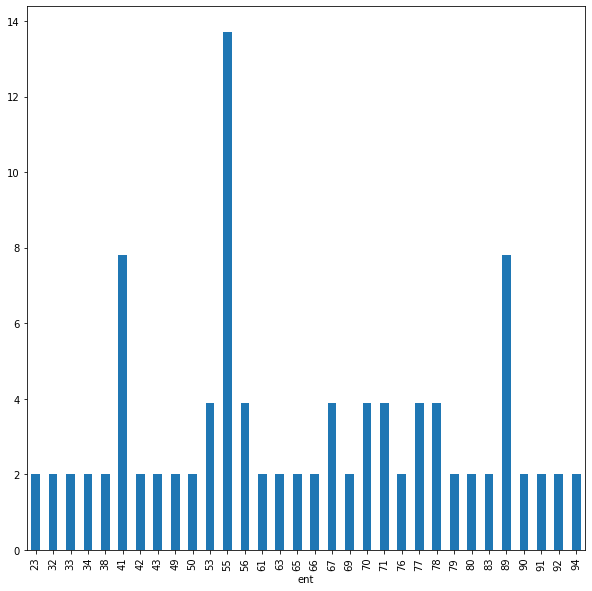

In [19]:
plt.figure(figsize=(10,10))
count_ex['perc_total'].plot.bar()

In [20]:
count_ex=ex.groupby('sc').count()
count_ex['perc_total']=round(count_ex['s_id']*100/count_ex['s_id'].sum(),1)
count_ex

,s_id,hsc,ent,perc_total
sc,,,,
43,2,2,2,3.9
44,2,2,2,3.9
45,1,1,1,2.0
50,1,1,1,2.0
54,1,1,1,2.0
55,1,1,1,2.0
58,1,1,1,2.0
59,2,2,2,3.9
60,1,1,1,2.0


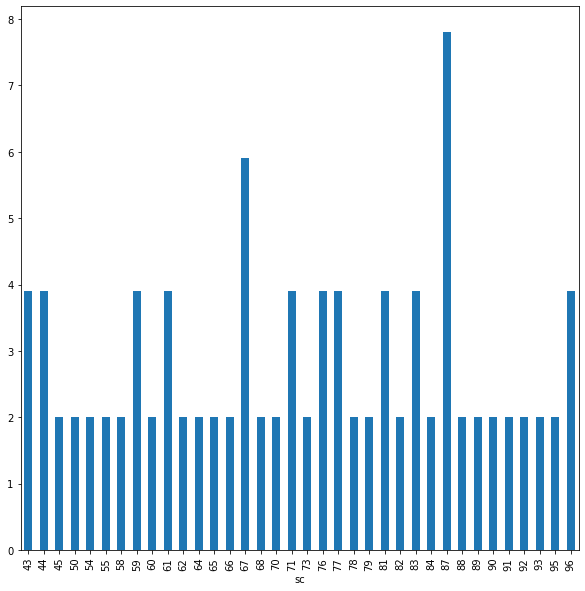

In [21]:
plt.figure(figsize=(10,10))
count_ex['perc_total'].plot.bar()

In [22]:
count_ex=ex.groupby('hsc').count()
count_ex['perc_total']=round(count_ex['s_id']*100/count_ex['s_id'].sum(),1)
count_ex

,s_id,sc,ent,perc_total
hsc,,,,
43,1,1,1,2.0
44,1,1,1,2.0
45,1,1,1,2.0
49,1,1,1,2.0
50,1,1,1,2.0
55,2,2,2,3.9
56,1,1,1,2.0
60,3,3,3,5.9
61,3,3,3,5.9


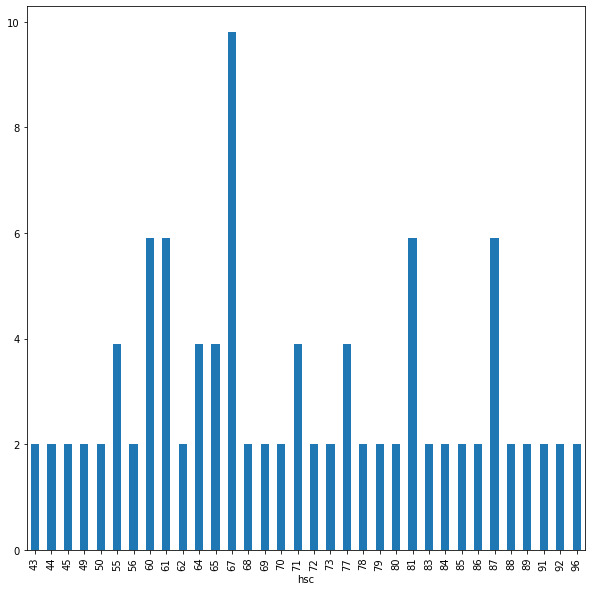

In [23]:
plt.figure(figsize=(10,10))
count_ex['perc_total'].plot.bar()

In [24]:
ratings=dataset1[['s_name','sc_%','hsc_%','ent_%']]
ratings_df=ratings.groupby(['s_name']).agg(np.max)
ratings_df.head(10)

,sc_%,hsc_%,ent_%
s_name,,,
a_bose,76,61,77
a_das,79,79,33
a_ganguly,59,60,43
a_gupta,77,77,71
a_mitra,78,71,66
a_p,77,72,79
a_roy,88,45,41
a_sharma,65,65,67
b_dash,54,55,38


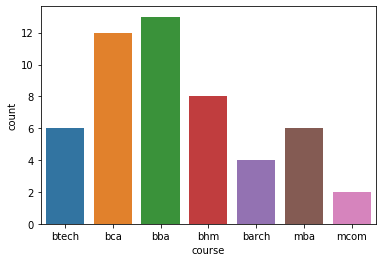

In [25]:
plot=dataset1['course']
sns.countplot(plot)

In [26]:
bank1=dataset4['bank']
bank1.head()

0    sbi/ubi
1    sbi/ubi
2       hdfc
3       hdfc
4       hdfc
Name: bank, dtype: object

In [27]:
dataset4['bank'].value_counts()

ubi            11
hdfc           10
idbi            7
sbi/ubi         5
ubi/pnb         3
pnb             2
sbi/pnb         2
sbi/idbi        2
sbi/hdfc        2
pnb/ubi         1
sbi/uco         1
sbi             1
ubi/pnb/sbi     1
kanara          1
hdfc/uco        1
hdfc/idbi       1
Name: bank, dtype: int64

In [28]:
dataset4['amount'].value_counts()

twolack      14
threelack    13
fourlack      8
fivelack      4
onelack       4
tenlack       3
ninelack      2
sevenlack     2
sixlack       1
Name: amount, dtype: int64

In [29]:
dataset4['amount'].unique()

array(['fourlack', 'twolack', 'threelack', 'fivelack', 'sevenlack',
       'onelack', 'sixlack', 'tenlack', 'ninelack'], dtype=object)

In [30]:
avg=pd.DataFrame(dfnew.groupby('s_id')['sc'].agg(['mean','count']))
avg['s_id']=avg.index
avg.head()

,mean,count,s_id
s_id,,,
1,73,1,1
2,61,1,2
3,61,1,3
4,84,1,4
5,92,1,5


In [31]:
avg1=pd.DataFrame(dfnew.groupby('s_id')['hsc'].agg(['mean','count']))
avg1['s_id']=avg1.index
avg1.head()

,mean,count,s_id
s_id,,,
1,64,1,1
2,61,1,2
3,73,1,3
4,84,1,4
5,67,1,5


In [32]:
avg2=pd.DataFrame(dfnew.groupby('s_id')['ent'].agg(['mean','count']))
avg2['s_id']=avg2.index
avg2.head()

,mean,count,s_id
s_id,,,
1,32,1,1
2,55,1,2
3,71,1,3
4,89,1,4
5,53,1,5


In [33]:
avg3=pd.DataFrame(dfnew.groupby('s_id')['l6m'].agg(['mean','count']))
avg3['s_id']=avg3.index
avg3.head()

,mean,count,s_id
s_id,,,
1,200000,1,1
2,200000,1,2
3,25000,1,3
4,67000,1,4
5,6000,1,5


In [34]:
idx2bank={int(row['s_id']):row['amount'] for _,row in dataset4.iterrows()}
bank2idx={j:i for i,j in idx2bank.items()}

In [35]:
idx2bank

{1: 'fourlack',
 2: 'twolack',
 3: 'twolack',
 4: 'twolack',
 5: 'fourlack',
 6: 'threelack',
 7: 'threelack',
 8: 'threelack',
 9: 'threelack',
 10: 'threelack',
 11: 'fourlack',
 12: 'fivelack',
 13: 'fivelack',
 14: 'threelack',
 15: 'threelack',
 16: 'twolack',
 17: 'twolack',
 18: 'sevenlack',
 19: 'sevenlack',
 20: 'fourlack',
 21: 'fourlack',
 22: 'twolack',
 23: 'twolack',
 24: 'threelack',
 25: 'threelack',
 26: 'threelack',
 27: 'fourlack',
 28: 'fourlack',
 29: 'twolack',
 30: 'twolack',
 31: 'twolack',
 32: 'onelack',
 33: 'threelack',
 34: 'fivelack',
 35: 'fivelack',
 36: 'sixlack',
 37: 'tenlack',
 38: 'tenlack',
 39: 'twolack',
 40: 'twolack',
 41: 'twolack',
 42: 'twolack',
 43: 'threelack',
 44: 'onelack',
 45: 'fourlack',
 46: 'threelack',
 47: 'ninelack',
 48: 'ninelack',
 49: 'tenlack',
 50: 'onelack',
 51: 'onelack'}

In [36]:
dd1=dataset4.drop(['s_id'],axis=1)
dd1.head()

,amount,bank
0,fourlack,sbi/ubi
1,twolack,sbi/ubi
2,twolack,hdfc
3,twolack,hdfc
4,fourlack,hdfc


In [37]:
dd2=dfnew.drop(['s_id'],axis=1)
dd2.head()

,sc,hsc,ent,course,l6m
0,73,64,32,btech,200000
1,61,61,55,btech,200000
2,61,73,71,btech,25000
3,84,84,89,bca,67000
4,92,67,53,bca,6000


In [38]:
freshdata=pd.concat([dd2,dd1],axis=1)

In [39]:
freshdata.head()

,sc,hsc,ent,course,l6m,amount,bank
0,73,64,32,btech,200000,fourlack,sbi/ubi
1,61,61,55,btech,200000,twolack,sbi/ubi
2,61,73,71,btech,25000,twolack,hdfc
3,84,84,89,bca,67000,twolack,hdfc
4,92,67,53,bca,6000,fourlack,hdfc


In [40]:
freshdata.isnull().sum()

sc        0
hsc       0
ent       0
course    0
l6m       0
amount    0
bank      0
dtype: int64

In [41]:
freshdata.values.tolist()

[[73, 64, 32, 'btech', 200000, 'fourlack', 'sbi/ubi'],
 [61, 61, 55, 'btech', 200000, 'twolack', 'sbi/ubi'],
 [61, 73, 71, 'btech', 25000, 'twolack', 'hdfc'],
 [84, 84, 89, 'bca', 67000, 'twolack', 'hdfc'],
 [92, 67, 53, 'bca', 6000, 'fourlack', 'hdfc'],
 [43, 43, 56, 'bca', 100000, 'threelack', 'pnb'],
 [71, 71, 55, 'bca', 250000, 'threelack', 'idbi'],
 [44, 44, 55, 'bca', 41000, 'threelack', 'idbi'],
 [45, 55, 55, 'bca', 2000, 'threelack', 'sbi/idbi'],
 [67, 67, 55, 'bca', 7700, 'threelack', 'sbi/hdfc'],
 [96, 96, 55, 'bca', 100000, 'fourlack', 'sbi/hdfc'],
 [43, 67, 55, 'bba', 25670, 'fivelack', 'kanara'],
 [55, 81, 67, 'bba', 8350, 'fivelack', 'ubi/pnb'],
 [62, 62, 78, 'bba', 210, 'threelack', 'ubi/pnb'],
 [68, 68, 42, 'bba', 70000, 'threelack', 'ubi/pnb/sbi'],
 [87, 77, 78, 'bba', 12000, 'twolack', 'ubi/pnb'],
 [79, 79, 33, 'bba', 30004, 'twolack', 'sbi/uco'],
 [59, 60, 43, 'bba', 3400, 'sevenlack', 'sbi/idbi'],
 [81, 69, 70, 'bba', 2100, 'sevenlack', 'idbi'],
 [81, 81, 80, 'bhm',

In [42]:
q=[]
for i in range(len(freshdata)):
    q.append([str(freshdata.values[i,j]) for j in range(0,6) if str(freshdata.values[i,j])!='nan'])
q

[['73', '64', '32', 'btech', '200000', 'fourlack'],
 ['61', '61', '55', 'btech', '200000', 'twolack'],
 ['61', '73', '71', 'btech', '25000', 'twolack'],
 ['84', '84', '89', 'bca', '67000', 'twolack'],
 ['92', '67', '53', 'bca', '6000', 'fourlack'],
 ['43', '43', '56', 'bca', '100000', 'threelack'],
 ['71', '71', '55', 'bca', '250000', 'threelack'],
 ['44', '44', '55', 'bca', '41000', 'threelack'],
 ['45', '55', '55', 'bca', '2000', 'threelack'],
 ['67', '67', '55', 'bca', '7700', 'threelack'],
 ['96', '96', '55', 'bca', '100000', 'fourlack'],
 ['43', '67', '55', 'bba', '25670', 'fivelack'],
 ['55', '81', '67', 'bba', '8350', 'fivelack'],
 ['62', '62', '78', 'bba', '210', 'threelack'],
 ['68', '68', '42', 'bba', '70000', 'threelack'],
 ['87', '77', '78', 'bba', '12000', 'twolack'],
 ['79', '79', '33', 'bba', '30004', 'twolack'],
 ['59', '60', '43', 'bba', '3400', 'sevenlack'],
 ['81', '69', '70', 'bba', '2100', 'sevenlack'],
 ['81', '81', '80', 'bhm', '2100', 'fourlack'],
 ['77', '77', 

In [43]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [44]:
from apyori import apriori

In [45]:
f=apriori(q,min_support=0.03,min_confidence=0.35,min_lift=3,min_length=2)

In [46]:
print(f)

<generator object apriori at 0x0000026A4BBBECC8>


In [47]:
list(f)

[RelationRecord(items=frozenset({'100000', 'bca'}), support=0.0392156862745098, ordered_statistics=[OrderedStatistic(items_base=frozenset({'100000'}), items_add=frozenset({'bca'}), confidence=1.0, lift=4.25)]),
 RelationRecord(items=frozenset({'200000', 'btech'}), support=0.0392156862745098, ordered_statistics=[OrderedStatistic(items_base=frozenset({'200000'}), items_add=frozenset({'btech'}), confidence=1.0, lift=8.5)]),
 RelationRecord(items=frozenset({'81', '2100'}), support=0.0392156862745098, ordered_statistics=[OrderedStatistic(items_base=frozenset({'2100'}), items_add=frozenset({'81'}), confidence=1.0, lift=12.75), OrderedStatistic(items_base=frozenset({'81'}), items_add=frozenset({'2100'}), confidence=0.5, lift=12.75)]),
 RelationRecord(items=frozenset({'41', 'bhm'}), support=0.058823529411764705, ordered_statistics=[OrderedStatistic(items_base=frozenset({'41'}), items_add=frozenset({'bhm'}), confidence=0.75, lift=4.78125), OrderedStatistic(items_base=frozenset({'bhm'}), items_a